<a href="https://colab.research.google.com/github/s34836/EWD/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tasks
1. Use k-NN with k=2 to classify the following examples as A or B.
    - Training set: A(1, 3), A(2, 1), A(2, 3), B(4, 3), B(6, 3).
    - Examples to classify: (1, 5), (5, 1), (2, 6), (3, 4).



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

# Training set
X_train = [(1, 3), (2, 1), (2, 3), (4, 3), (6, 3)]
y_train = ['A', 'A', 'A', 'B', 'B']

# Examples to classify
X_test = [(1, 5), (5, 1), (2, 6), (3, 4)]

# Create and train the model
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict and print results
predictions = knn.predict(X_test)
for point, label in zip(X_test, predictions):
    print(f"{point} = {label}")

(1, 5) = A
(5, 1) = B
(2, 6) = A
(3, 4) = A


2. Classify cases from the `wdbc.data` dataset as `M` - *malignant* or `B` - *benign*.



---


In [47]:
df = pd.read_csv("wdbc.data")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_SE                569 non-null    float64
 12  texture_SE               569 non-null    float64
 13  perimeter_SE             569 non-null    float64
 14  area_SE                  5

In [49]:
df.groupby('diagnosis').size()

,0
diagnosis,
B,357
M,212


    - Split the data into a training, validation and test set.


In [55]:
y = df["diagnosis"]  # <- decision attribute
X = df.drop(columns=["diagnosis"])  # <- attributes

# Najpierw podział na zbiór treningowo-walidacyjny (80%) i testowy (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10
)

# Z tren-val wydzielamy walidacyjny (25% z 80% = 20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Sprawdzamy rozmiary
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
#y_train.value_counts()
#y_val.value_counts()
#y_test.value_counts()

Training set: 341 samples
Validation set: 114 samples
Test set: 114 samples


    - Use k-NN to classify validation examples based on the training data. Print the accuracy, precision, recall and F1-score (see. [metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics), [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). The confusion matrix may also provide useful information ([`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)).


In [56]:
# Inicjalizacja skalera
scaler = StandardScaler()

# Dopasuj skalera do danych treningowych i przekształć wszystkie zbiory
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Przygotuj listę wyników
metrics_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, pos_label='M')
    rec = recall_score(y_val, y_val_pred, pos_label='M')
    f1 = f1_score(y_val, y_val_pred, pos_label='M')

    metrics_list.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

# Stwórz DataFrame z metrykami
metrics_df = pd.DataFrame(metrics_list)

# Posortuj po accuracy malejąco
metrics_df_sorted = metrics_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

# Wyświetlenie tabeli
print(metrics_df_sorted.to_string(index=False))

# Najlepsze k
best_k = metrics_df_sorted.loc[0, 'k']
print(f"Najlepsze k: {best_k}")

 k  accuracy  precision   recall  f1_score
 6  0.982456   0.976744 0.976744  0.976744
 7  0.982456   0.976744 0.976744  0.976744
 5  0.982456   0.976744 0.976744  0.976744
 4  0.973684   0.976190 0.953488  0.964706
 3  0.973684   0.976190 0.953488  0.964706
 8  0.964912   0.975610 0.930233  0.952381
 9  0.964912   0.975610 0.930233  0.952381
14  0.956140   0.975000 0.906977  0.939759
13  0.956140   0.975000 0.906977  0.939759
10  0.956140   0.975000 0.906977  0.939759
11  0.956140   0.975000 0.906977  0.939759
12  0.956140   0.975000 0.906977  0.939759
17  0.956140   0.975000 0.906977  0.939759
18  0.956140   0.975000 0.906977  0.939759
15  0.956140   0.975000 0.906977  0.939759
16  0.956140   0.975000 0.906977  0.939759
19  0.956140   0.975000 0.906977  0.939759
20  0.956140   0.975000 0.906977  0.939759
 2  0.947368   0.974359 0.883721  0.926829
 1  0.938596   0.928571 0.906977  0.917647
Najlepsze k: 6


    - Observe the effect of scaling the data on model accuracy. Remember to also scale the validation/test set.


In [69]:
# wszytsko dla k ==2 bo wyszło najlepsze
# 1. k-NN bez skalowania

knn_no_scaling = KNeighborsClassifier(n_neighbors=int(best_k))
knn_no_scaling.fit(X_train, y_train)
y_val_pred_no_scaling = knn_no_scaling.predict(X_val)

acc_no_scaling = accuracy_score(y_val, y_val_pred_no_scaling)

# 2. k-NN ze skalowaniem
knn_scaled = KNeighborsClassifier(n_neighbors=int(best_k))
knn_scaled.fit(X_train_scaled, y_train)
y_val_pred_scaled = knn_scaled.predict(X_val_scaled)

acc_scaled = accuracy_score(y_val, y_val_pred_scaled)

# 3. Porównanie
print("=== Porównanie dokładności ===")
print(f"Bez skalowania: {acc_no_scaling:.4f}")
print(f"Ze skalowaniem: {acc_scaled:.4f}")
print(f"Best k: {best_k}")

=== Porównanie dokładności ===
Bez skalowania: 0.9649
Ze skalowaniem: 0.9825
Best k: 6


    - Create a plot showing how k-NN accuracy varies for different values of k. Use the validation set.


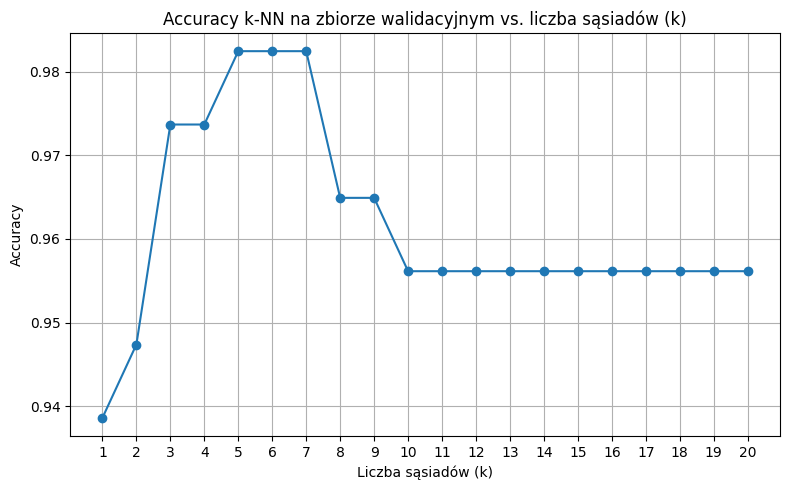

In [70]:


# Zbieramy accuracy dla k = 1 do 20
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    accuracies.append(acc)

# Tworzymy wykres
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Accuracy k-NN na zbiorze walidacyjnym vs. liczba sąsiadów (k)")
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

    - Select the best model and evaluate it using the test set.

In [72]:
# Najlepszy model z k=best_k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_test_pred = final_knn.predict(X_test_scaled)

# Ocena jakości modelu
print("=== FINAL EVALUATION ON TEST SET ===")
print(f"Best k: {best_k}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

=== FINAL EVALUATION ON TEST SET ===
Best k: 6
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[72  0]
 [ 5 37]]


3. Use the `KNeighborsRegressor` to predict house prices (`medv`) from the `boston` dataset. Perform steps similar to Task 2. To evaluate a regression model you can use the mean squared error (see: [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).


In [73]:
df = pd.read_csv("boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [75]:
# X – cechy, y – wartość domu (medv)
X = df.drop(columns=["medv"])
y = df["medv"]

# 1. Podział: 80% (train+val), 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# 2. Podział: z 80% → 60% (train), 20% (val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Sprawdź rozmiary
print(f"Training set:     {X_train.shape[0]} samples")
print(f"Validation set:   {X_val.shape[0]} samples")
print(f"Test set:         {X_test.shape[0]} samples")

Training set:     303 samples
Validation set:   101 samples
Test set:         102 samples


In [76]:
#SKALOWANIE

# Inicjalizacja skalera
scaler = StandardScaler()

# Dopasowanie do zbioru treningowego i przekształcenie wszystkich zbiorów
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

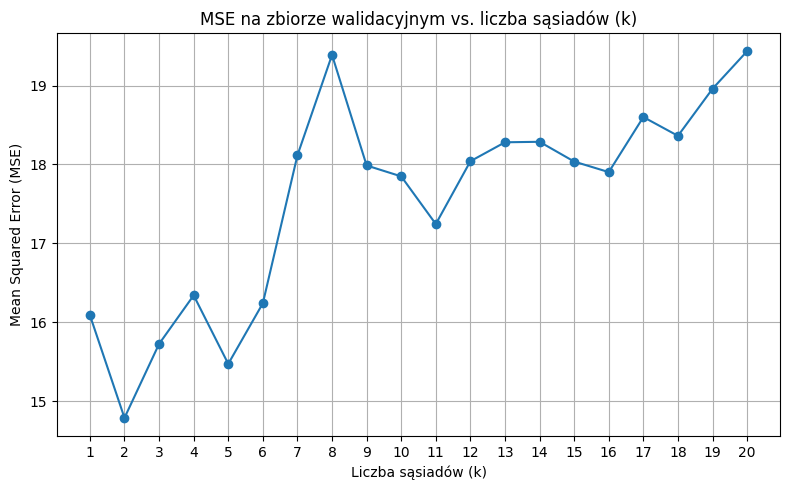

✅ Najlepsze k: 2 (najniższy MSE: 14.7865)


In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Zakres k
k_values = range(1, 21)
mse_list = []

# Testowanie różnych k
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_val_pred)
    mse_list.append(mse)

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_list, marker='o')
plt.title("MSE na zbiorze walidacyjnym vs. liczba sąsiadów (k)")
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# Najlepsze k
best_k = k_values[mse_list.index(min(mse_list))]
print(f"✅ Najlepsze k: {best_k} (najniższy MSE: {min(mse_list):.4f})")

In [78]:
# Używamy wcześniej wybranego najlepszego k == 1
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_test_pred = final_model.predict(X_test_scaled)

# Obliczenie MSE
mse_test = mean_squared_error(y_test, y_test_pred)

# Wynik końcowy
print("=== TEST SET EVALUATION ===")
print(f"Najlepsze k: {best_k}")
print(f"Mean Squared Error (MSE) na zbiorze testowym: {mse_test:.4f}")

=== TEST SET EVALUATION ===
Najlepsze k: 2
Mean Squared Error (MSE) na zbiorze testowym: 17.9389
